In [16]:
import pandas as pd
import seaborn as sb
sb.set()

### Load data

In [2]:
temp = pd.read_json("./data.json")
df = pd.json_normalize(temp['data'])
df.head()


,id,title,description,image,rank,mean_score,life,status,genres,media_type,release_year,date
0,2076,Kindaichi Shounen no Jikenbo,Hajime Kindaichi's unorganized appearance and ...,https://api-cdn.myanimelist.net/images/anime/1...,637,7.95,7,finished_airing,"Mystery,Shounen",tv,1997,2022-06-26
1,3371,Ginga Eiyuu Densetsu Gaiden,Ginga Eiyuu Densetsu Gaiden is the first of tw...,https://api-cdn.myanimelist.net/images/anime/9...,402,8.13,6,finished_airing,"Action,Drama,Military,Sci-Fi,Space",ova,1998,2022-06-27
2,37779,Yakusoku no Neverland,"Surrounded by a forest and a gated entrance, t...",https://api-cdn.myanimelist.net/images/anime/1...,100,8.54,7,finished_airing,"Mystery,Psychological,Sci-Fi,Shounen,Survival,...",tv,2019,2022-06-28
3,2150,Tanoshii Muumin Ikka,"Spring has finally arrived in Moomin Valley, g...",https://api-cdn.myanimelist.net/images/anime/1...,331,8.20,6,finished_airing,"Adventure,Comedy,Fantasy,Iyashikei,Kids,Slice ...",tv,1990,2022-06-29
4,27947,Lupin III (2015),Lupin is the main character in this series whi...,https://api-cdn.myanimelist.net/images/anime/9...,716,7.90,6,finished_airing,"Action,Adult Cast,Adventure,Comedy,Mystery,Seinen",tv,2015,2022-06-30


### Pre-process

In [3]:
df['letter_count'] = df.apply(lambda row: len(row['title']), axis=1)
df['unique_letter_count'] = df.apply(lambda row: len(set(row["title"].lower())), axis=1)
df.head()

,id,title,description,image,rank,mean_score,life,status,genres,media_type,release_year,date,letter_count,unique_letter_count
0,2076,Kindaichi Shounen no Jikenbo,Hajime Kindaichi's unorganized appearance and ...,https://api-cdn.myanimelist.net/images/anime/1...,637,7.95,7,finished_airing,"Mystery,Shounen",tv,1997,2022-06-26,28,14
1,3371,Ginga Eiyuu Densetsu Gaiden,Ginga Eiyuu Densetsu Gaiden is the first of tw...,https://api-cdn.myanimelist.net/images/anime/9...,402,8.13,6,finished_airing,"Action,Drama,Military,Sci-Fi,Space",ova,1998,2022-06-27,27,11
2,37779,Yakusoku no Neverland,"Surrounded by a forest and a gated entrance, t...",https://api-cdn.myanimelist.net/images/anime/1...,100,8.54,7,finished_airing,"Mystery,Psychological,Sci-Fi,Shounen,Survival,...",tv,2019,2022-06-28,21,13
3,2150,Tanoshii Muumin Ikka,"Spring has finally arrived in Moomin Valley, g...",https://api-cdn.myanimelist.net/images/anime/1...,331,8.20,6,finished_airing,"Adventure,Comedy,Fantasy,Iyashikei,Kids,Slice ...",tv,1990,2022-06-29,20,11
4,27947,Lupin III (2015),Lupin is the main character in this series whi...,https://api-cdn.myanimelist.net/images/anime/9...,716,7.90,6,finished_airing,"Action,Adult Cast,Adventure,Comedy,Mystery,Seinen",tv,2015,2022-06-30,16,12


### Graphs

[Text(0.5, 1.0, 'letter count')]

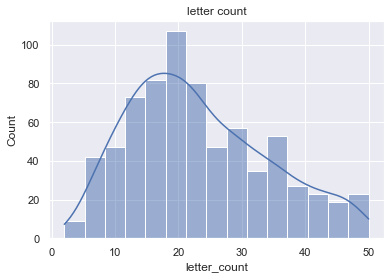

In [17]:
sb.histplot(data=df, x="letter_count", kde=True).set(title= "letter count")

[Text(0.5, 1.0, 'letter count')]

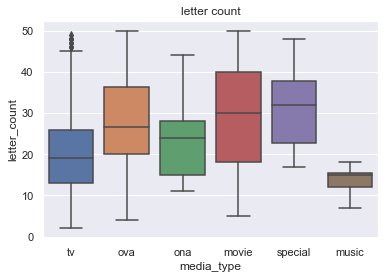

In [28]:
sb.boxplot(data=df, x="media_type", y="letter_count").set(title= "letter count")

<AxesSubplot:xlabel='letter_count', ylabel='Count'>

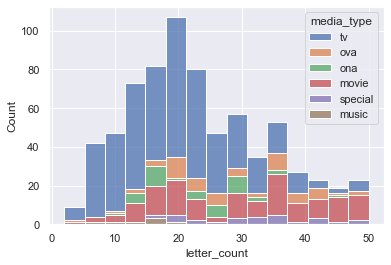

In [31]:
sb.histplot(data=df, x="letter_count", hue="media_type", multiple="stack")

[Text(0.5, 1.0, 'unique letter count')]

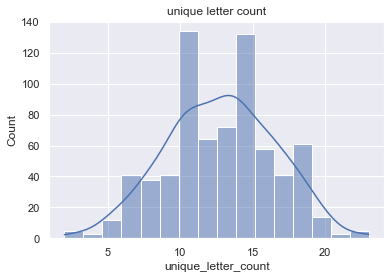

In [18]:
sb.histplot(data=df, x="unique_letter_count", kde=True).set(title="unique letter count")

[Text(0.5, 1.0, 'Anime Released')]

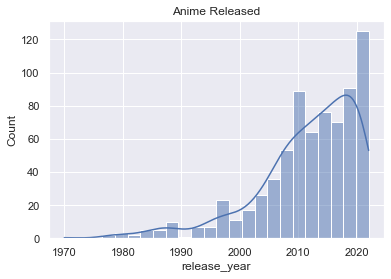

In [30]:
sb.histplot(data=df, x="release_year", kde=True).set(title="Anime Released")

[Text(0.5, 1.0, 'media type')]

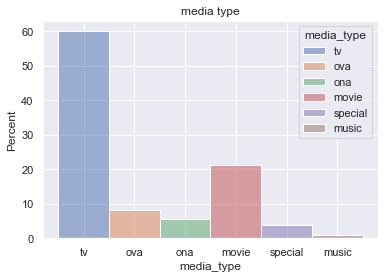

In [25]:
sb.histplot(data=df, x="media_type", hue="media_type", stat="percent").set(title="media type")